# Selective Blur

In [1]:
from selective_blur.masking.segmentation import Segmenter
from selective_blur.masking.mask_tools import MaskEditor, show_image_and_mask
from selective_blur.blurring.blur import Selector
from selective_blur.blending.blender import Blender
from PIL import Image
import os

In [3]:
image_name = "model.jpg"
image_path = os.path.join("images/inputs", image_name)

## Mask

### Selection

BBoxWidget(bboxes=[{'x': 1067, 'y': 1173, 'width': 0, 'height': 0, 'label': ''}, {'x': 446, 'y': 813, 'width':…

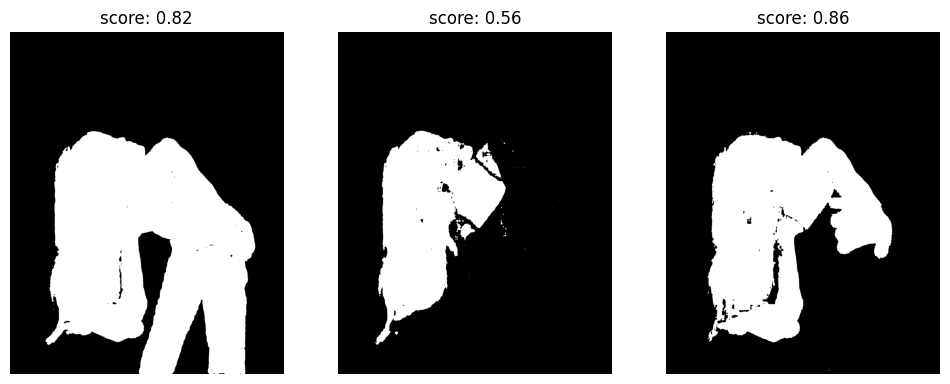

In [4]:
s = Segmenter(image_path)
s.select_from_image()

In [12]:
s.choose_mask(0)

### Cleaning

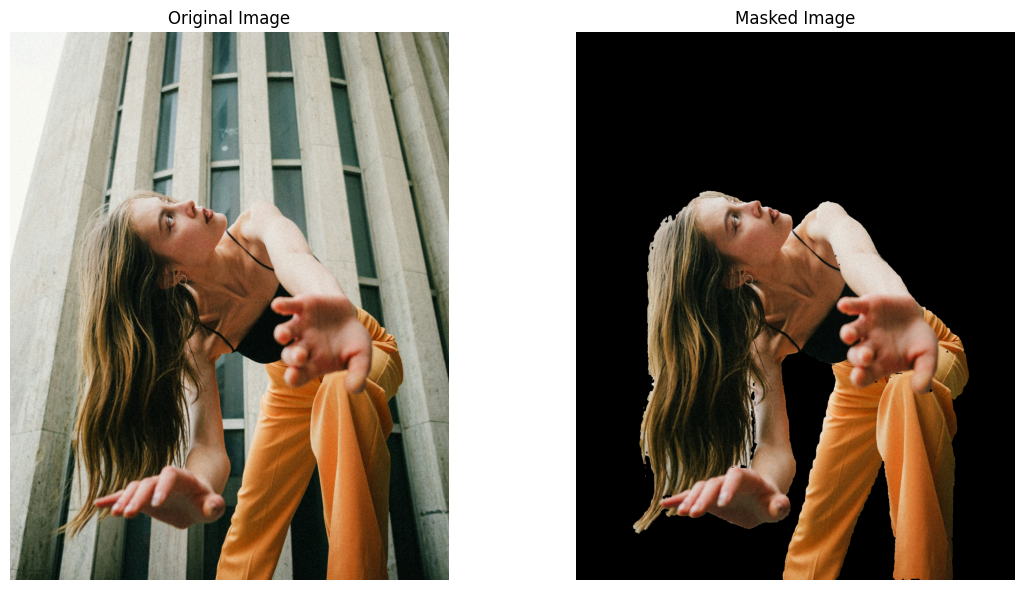

In [13]:
show_image_and_mask(s.image_bgr, s.best_mask)

FloatSlider(value=0.5, continuous_update=False, description='Denoise level:', max=1.0)

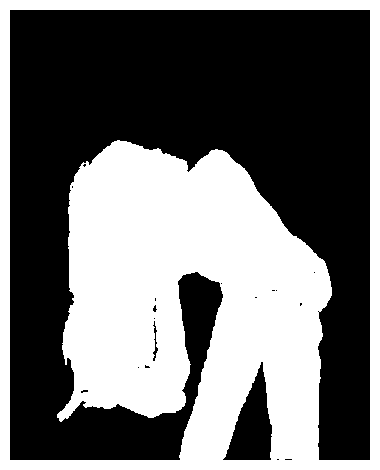

In [14]:
editor = MaskEditor(s.best_mask)
editor.auto_denoise()

In [15]:
editor.manual_edit()

Mask correctly saved


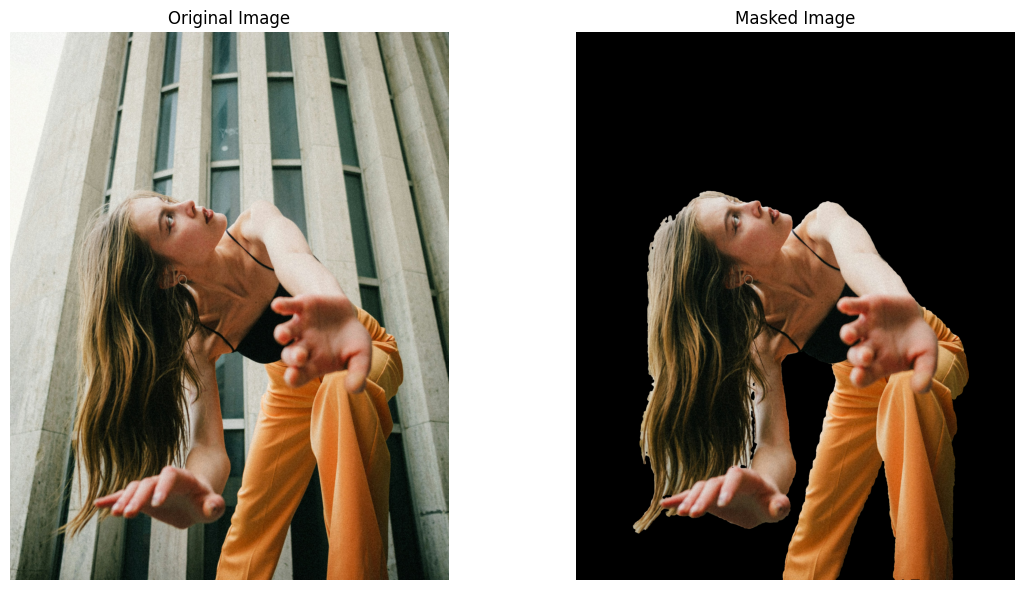

In [16]:
show_image_and_mask(s.image_bgr, editor.mask)

## Blurring

Using cache found in C:\Users\Andrea/.cache\torch\hub\intel-isl_MiDaS_master
Using cache found in C:\Users\Andrea/.cache\torch\hub\intel-isl_MiDaS_master


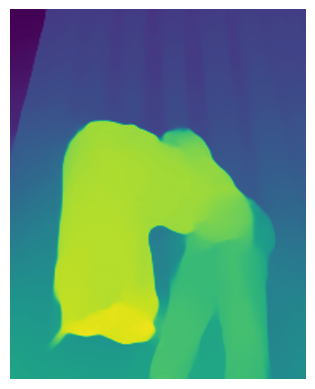

In [17]:
sel = Selector(image_path, model="DPT_Hybrid", mask=editor.mask)
sel.show_depth_map()

IntSlider(value=23, continuous_update=False, description='Intensity:')

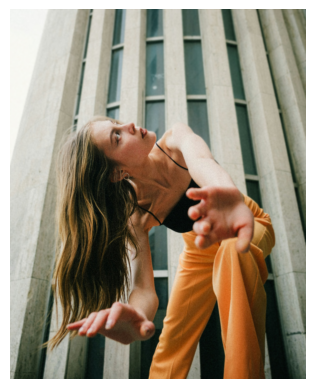

In [18]:
sel.select_kernel_size()

## Final image

FloatSlider(value=0.6, continuous_update=False, description='Sharpness level:', max=1.0)

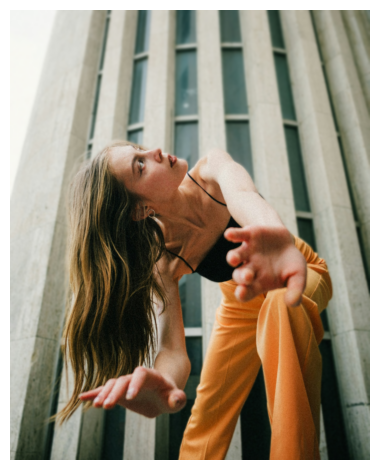

In [22]:
b = Blender(mask=editor.mask, original_image=sel.image, image_blurred=sel.image_blurred)
b.blend()

In [53]:
image = Image.fromarray(b.final_rgb)
image.save(os.path.join("images/edited", image_name.split(".")[0] + ".jpg"), "JPEG")